## Generating Pi from Monte Carlo simulations

* Side note, this only works for values where the square either as unit length currently. However, this can easily be changed 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def generate_points(length_square=1, num_samples=10):
    
    X = np.random.uniform(low= 0., high=length_square, size=num_samples)
    Y = np.random.uniform(low= 0., high=length_square, size=num_samples)
    
    return np.array((X,Y)).T


In [4]:
def is_point_in_rectangle(points, length_square=1, plot = False):
    
    in_rectangle_bool = np.array([1 if (0 <= point[0] <= length_square) and (0 <= point[1] <= length_square) 
            else 0 
            for point in points ])

    return np.sum(in_rectangle_bool)

def is_point_in_circle(points, length_square=1, plot = False):
    x_center = length_square/2
    y_center = length_square/2
    
    in_circle_bool = np.array([1 if (point[0]-x_center)**2 + (point[1] - y_center)**2 < (length_square/2)**2
                     else 0 
                     for point in points])
    
    return np.sum(in_circle_bool)

def plot_sim(points, pi_estimate, absolute_error, num_samples, length_square=1):
    fig, ax = plt.subplots(figsize=(6,6))
    
    circle = plt.Circle((length_square/2, length_square/2), radius=length_square/2, color='red', fill=False, linewidth=3, label = 'Circle')
    rectangle = plt.Rectangle((0,0), width=length_square, height=length_square, color = 'green', fill=False, linewidth=3, label = 'Rectangle')

    ax.scatter(points[:,0], points[:,1], alpha=0.05, color = 'blue', label = 'points')
    ax.add_patch(circle)
    ax.add_patch(rectangle)
    
    ax.set_title(f"$\pi$ ≈ {pi_estimate} , Abs. error = {round(absolute_error,3)}, N points = {num_samples}")
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    
    plt.tight_layout()
    plt.legend(loc='best')
    plt.show()

def pi_monte_carlo(num_samples, length_square=1, plot = False):

    points = generate_points(length_square=length_square,
                             num_samples=num_samples)
    
    n_rectangle = is_point_in_rectangle(points=points, length_square=length_square)
    n_circle = is_point_in_circle(points=points, length_square=length_square)

    radius_squared = (length_square/2)**2
    pi_estimate = (n_circle/(n_rectangle*radius_squared))
    absolute_error = abs(np.pi-pi_estimate)

    if plot:
        plot_sim(points=points, pi_estimate=pi_estimate, absolute_error=absolute_error, num_samples=num_samples)

    return pi_estimate, absolute_error
    


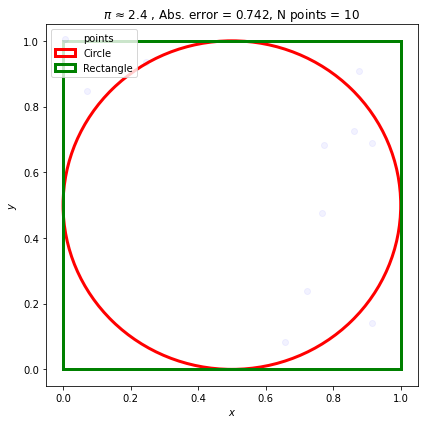

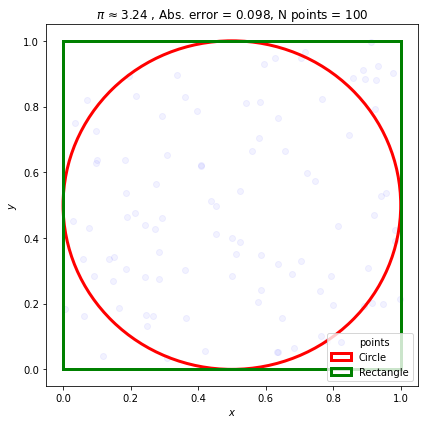

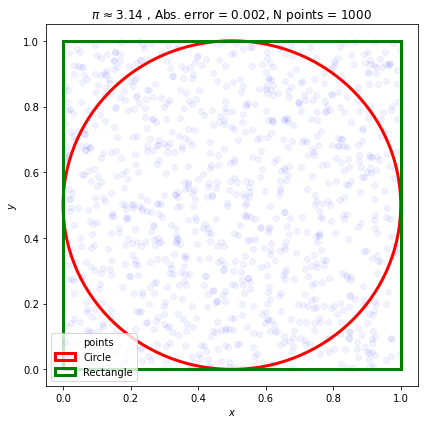

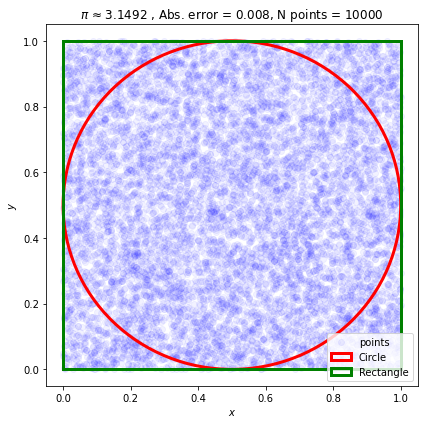

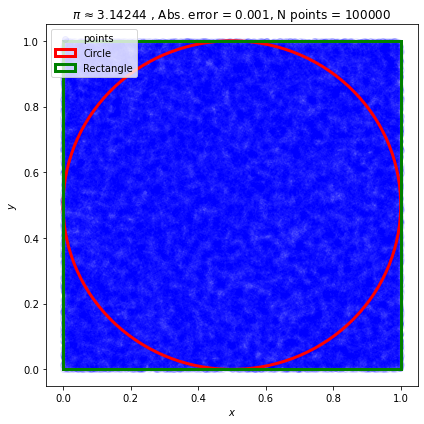

In [5]:
for i in range(1,6):
    pi_monte_carlo(10**i, length_square=1, plot=True)